In [1]:
# https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook#Business-Goal

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./store_clean.csv')

df.head()

,Unnamed: 0,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000
1,1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000
2,2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600
3,3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
4,4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000


In [3]:
df.shape

(5847, 9)

In [4]:
df.duplicated().value_counts()

False    5847
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0          0
trans_date          0
acc_created_date    0
trans_id            0
user_id             0
brand               0
product_name        0
quantity            0
sub_total           0
dtype: int64

In [6]:
df_rfm = df.copy()

df_rfm.drop(columns=['Unnamed: 0'], inplace=True)

df_rfm.head()

,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
0,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-44477208-20195,6ae66dba4a,Geo Magazine,Geo Magazine 12 Month Printed Subscription,1,576000
1,2021-03-01 09:42:48,2021-03-01 09:39:28,INV-84260125-20195,6ae66dba4a,Insight Magazine,Insight Magazine 6 Month Printed Subscription,1,120000
2,2021-03-01 10:05:18,2021-03-01 05:10:49,INV-21702404-20196,fecd37e3fa,Kids Creativity Magazine,Kids Creativity Magazine 6 Month Printed Subsc...,1,145600
3,2021-03-01 15:58:35,2021-02-25 18:38:31,INV-46817248-20197,702981082e,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
4,2021-03-01 16:19:54,2021-03-01 16:16:50,INV-47598177-20198,d1fbab7576,Kindergarten Magazine,Kindergarten Magazine 6 Month Printed Subscrip...,1,182000


In [7]:
df_rfm.dtypes

trans_date          object
acc_created_date    object
trans_id            object
user_id             object
brand               object
product_name        object
quantity             int64
sub_total            int64
dtype: object

In [8]:
df_rfm['trans_date'] = pd.to_datetime(df_rfm['trans_date'])
df_rfm['acc_created_date'] = pd.to_datetime(df_rfm['acc_created_date'])

df_rfm.dtypes

trans_date          datetime64[ns]
acc_created_date    datetime64[ns]
trans_id                    object
user_id                     object
brand                       object
product_name                object
quantity                     int64
sub_total                    int64
dtype: object

In [9]:
monetary = df_rfm.groupby('user_id')['sub_total'].sum()

monetary.head()

user_id
001b5eddf7    591500
0023cedbf9      7000
0024ae4898    436800
002d8b5849    204750
003e99a26e    145600
Name: sub_total, dtype: int64

In [10]:
frequency = df_rfm.groupby('user_id')['trans_id'].count().reset_index()

frequency.sort_values('trans_id', ascending=False).head()

,user_id,trans_id
2418,9efd34ffe5,21
602,278e551675,15
1868,7a8310aa9f,14
2492,a491801c2d,14
1677,6fce2e62f1,13


In [11]:
recency = df_rfm.copy()
recency = recency.sort_values(['user_id', 'trans_date'])

recency = recency.groupby(['user_id', 'trans_date'])['sub_total'].sum().reset_index()

recency['diff_date'] = recency.groupby('user_id')['trans_date'].diff().dt.days
recency['diff_date'] = recency['diff_date'].fillna(0)
recency['diff_date'] = np.abs(recency['diff_date'])

recency = recency.groupby('user_id')['diff_date'].max().reset_index()

recency['diff_date'] = recency['diff_date'].astype('int64')

recency = recency[['user_id', 'diff_date']]

recency.head()

,user_id,diff_date
0,001b5eddf7,0
1,0023cedbf9,0
2,0024ae4898,0
3,002d8b5849,0
4,003e99a26e,0


In [12]:
df[df['user_id'].isin(['f50ce91bd7', '05389fd9c2'])]

,Unnamed: 0,trans_date,acc_created_date,trans_id,user_id,brand,product_name,quantity,sub_total
3542,3542,2022-03-12 16:41:13,2022-03-17 20:54:38,INV-82520171-28202,05389fd9c2,Kindergarten Creativity Magazine,Kindergarten Creativity Magazine 6 Month Print...,1,84000
3543,3543,2022-03-12 16:41:13,2022-03-17 20:54:38,INV-45353298-28202,05389fd9c2,Kids Magazine,Kids Magazine 6 Month Printed Subscription,1,291200
3549,3549,2022-03-13 10:42:04,2022-03-14 17:26:15,INV-21809026-28208,f50ce91bd7,Kids Magazine,Kids Magazine 12 Month Printed Subscription,1,582400


In [13]:
df_rfm = pd.merge(monetary, frequency, on='user_id', how='inner')
df_rfm = pd.merge(df_rfm, recency, on='user_id', how='inner')

df_rfm = df_rfm.rename(columns={'sub_total': 'monetary', 'trans_id': 'frequency', 'diff_date': 'recency'})

df_rfm.head()

,user_id,monetary,frequency,recency
0,001b5eddf7,591500,2,0
1,0023cedbf9,7000,1,0
2,0024ae4898,436800,2,0
3,002d8b5849,204750,1,0
4,003e99a26e,145600,1,0


In [14]:
df_rfm.shape

(3900, 4)

In [15]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_rfm[['monetary', 'frequency', 'recency']])

df_scaled

array([[ 0.43878721,  0.4416056 , -0.38293538],
       [-0.93476993, -0.4402489 , -0.38293538],
       [ 0.07524694,  0.4416056 , -0.38293538],
       ...,
       [ 0.75955804, -0.4402489 , -0.38293538],
       [-0.88542057, -0.4402489 , -0.38293538],
       [-0.09583084, -0.4402489 , -0.38293538]])

In [16]:
df_scaled.shape

(3900, 3)

In [17]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['monetary', 'frequency', 'recency']

df_scaled.head()

,monetary,frequency,recency
0,0.438787,0.441606,-0.382935
1,-0.934770,-0.440249,-0.382935
2,0.075247,0.441606,-0.382935
3,-0.470063,-0.440249,-0.382935
4,-0.609064,-0.440249,-0.382935


In [18]:
df_scaled['user_id'] = df_rfm['user_id']

df_scaled.head()

,monetary,frequency,recency,user_id
0,0.438787,0.441606,-0.382935,001b5eddf7
1,-0.934770,-0.440249,-0.382935,0023cedbf9
2,0.075247,0.441606,-0.382935,0024ae4898
3,-0.470063,-0.440249,-0.382935,002d8b5849
4,-0.609064,-0.440249,-0.382935,003e99a26e


In [19]:
df_scaled.describe()

,monetary,frequency,recency
count,3.900000e+03,3.900000e+03,3.900000e+03
mean,6.376666e-18,5.556809e-17,-4.554761e-17
std,1.000128e+00,1.000128e+00,1.000128e+00
min,-9.455798e-01,-4.402489e-01,-3.829354e-01
25%,-5.662947e-01,-4.402489e-01,-3.829354e-01
50%,-2.462289e-01,-4.402489e-01,-3.829354e-01
75%,3.318636e-01,4.416056e-01,-3.829354e-01
max,1.360637e+01,1.719684e+01,6.306973e+00


In [20]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['monetary', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.306533,0.660877
1,-1.023379,-0.185834
2,0.091216,0.543282
3,-0.748143,-0.035513
4,-0.830470,-0.080477


In [21]:
pca = PCA(n_components=2)

result = pca.fit_transform(df_scaled[['monetary', 'frequency', 'recency']])

df_pca = pd.DataFrame(result)
df_pca.columns = ['pca1', 'pca2']

df_pca.head()

,pca1,pca2
0,0.306533,0.660877
1,-1.023379,-0.185834
2,0.091216,0.543282
3,-0.748143,-0.035513
4,-0.830470,-0.080477


Text(0, 0.5, '2nd Principal Component')

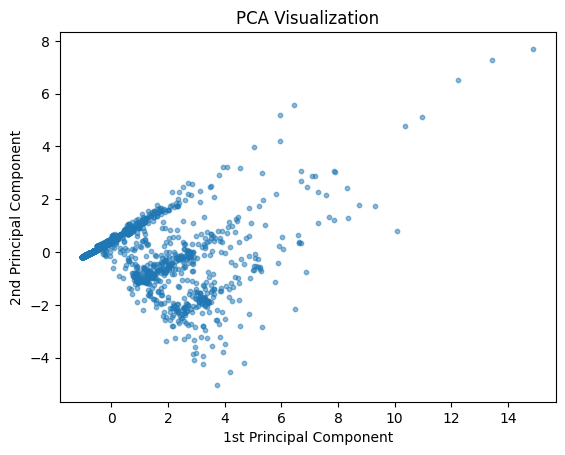

In [22]:
plt.scatter(x=df_pca['pca1'], y=df_pca['pca2'], alpha=0.5, s=10)

plt.title('PCA Visualization')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

In [23]:
param = {
  'n_init': [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

result = pd.DataFrame(columns=['K', 'Score', 'SilhouetteScore'])

loop = 0

inertia = []

for n in param['n_init']:
  km = KMeans(n_init=n, init='k-means++') 
  km.fit(df_pca)

  ss = silhouette_score(df_pca, km.labels_)

  inertia.append(km.inertia_)

  result.loc[loop] = [n, km.inertia_, ss]
        
  loop += 1 

In [24]:
result = result.sort_values(by='SilhouetteScore', ascending=False)

result

,K,Score,SilhouetteScore
5,7.0,882.087013,0.646567
0,2.0,851.022763,0.644709
7,9.0,843.148485,0.638622
1,3.0,843.157047,0.638567
4,6.0,842.906884,0.638358
3,5.0,843.199422,0.638312
6,8.0,843.199422,0.638312
8,10.0,843.169412,0.638055
2,4.0,849.673433,0.636761


In [25]:
n_cluster = int(result.iloc[0]['K'])

n_cluster

7

In [26]:
# km = KMeans(n_clusters=n_cluster, max_iter=max_iter)
km = KMeans(n_clusters=n_cluster, init='k-means++')
km.fit(df_pca)

KMeans(n_clusters=7)

In [27]:
centroid = km.cluster_centers_

centroid

array([[-7.49316702e-01, -3.66901364e-02],
       [ 4.41448295e+00,  5.83241040e-01],
       [ 1.19801619e+00,  1.10750032e+00],
       [ 1.67421544e+00, -7.45315758e-01],
       [ 8.38741233e+00,  3.32610157e+00],
       [ 8.26055022e-03,  4.15170809e-01],
       [ 3.10476781e+00, -2.17333742e+00]])

In [28]:
df_pca.head()

,pca1,pca2
0,0.306533,0.660877
1,-1.023379,-0.185834
2,0.091216,0.543282
3,-0.748143,-0.035513
4,-0.830470,-0.080477


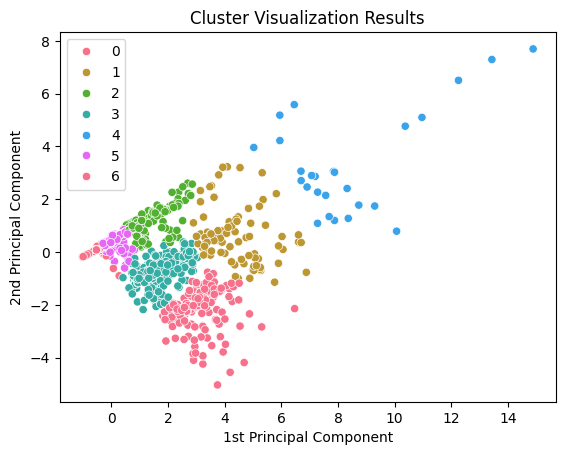

In [29]:
# plt.scatter(df_pca['pca1'], df_pca['pca2'], c=km.labels_, s=10, alpha=0.5)

sns.scatterplot(df_pca, x='pca1', y='pca2', hue=km.labels_, palette='husl')

plt.title('Cluster Visualization Results')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

plt.legend()

In [30]:
km.labels_

array([5, 0, 5, ..., 5, 0, 0])

In [31]:
df_rfm['label'] = km.labels_

df_rfm.head()

,user_id,monetary,frequency,recency,label
0,001b5eddf7,591500,2,0,5
1,0023cedbf9,7000,1,0,0
2,0024ae4898,436800,2,0,5
3,002d8b5849,204750,1,0,0
4,003e99a26e,145600,1,0,0


In [32]:
df_rfm.shape

(3900, 5)

In [33]:
df_scaled['label'] = km.labels_

df_scaled.head()

,monetary,frequency,recency,user_id,label
0,0.438787,0.441606,-0.382935,001b5eddf7,5
1,-0.934770,-0.440249,-0.382935,0023cedbf9,0
2,0.075247,0.441606,-0.382935,0024ae4898,5
3,-0.470063,-0.440249,-0.382935,002d8b5849,0
4,-0.609064,-0.440249,-0.382935,003e99a26e,0


    label   variable     value
0       0    recency -0.381147
1       1    recency  1.964751
2       2    recency -0.269414
3       3    recency  1.568696
4       4    recency  1.944187
5       5    recency -0.356883
6       6    recency  3.513501
7       0  frequency -0.429348
8       1  frequency  2.892341
9       2  frequency  1.087408
10      3  frequency  0.841295
11      4  frequency  6.919844
12      5  frequency  0.050895
13      6  frequency  0.772969
14      0   monetary -0.484494
15      1   monetary  2.757850
16      2   monetary  1.199399
17      3   monetary  0.529092
18      4   monetary  5.503090
19      5   monetary  0.297123
20      6   monetary  1.194633


<Axes: xlabel='variable', ylabel='value'>

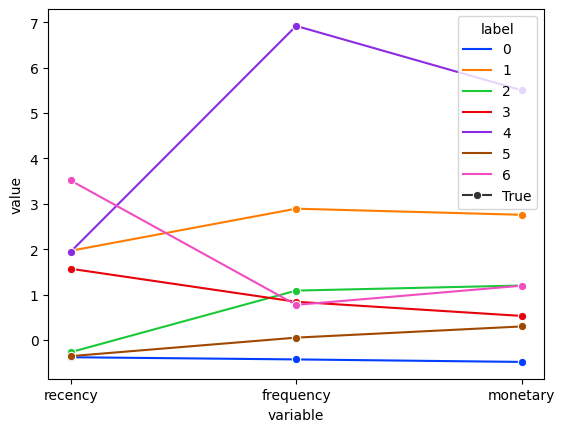

In [34]:
df_melt = df_scaled[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg("mean").reset_index()

df_melt = df_melt.melt(id_vars=['label'], value_vars=['recency', 'frequency', 'monetary', 'label'])

print(df_melt)

sns.lineplot(df_melt, x='variable', y='value', hue='label', palette='bright', markers='o', style=True)

In [35]:
df_melt = df_scaled[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg(["min", "max", "mean"]).reset_index()

df_melt

label  monetary                        recency                      \
              min        max      mean       min       max      mean   
0     0 -0.945580   0.176766 -0.484494 -0.382935  0.978727 -0.381147   
1     1 -0.732062   6.162608  2.757850 -0.382935  4.264479  1.964751   
2     2 -0.919636   3.842718  1.199399 -0.382935  0.949126 -0.269414   
3     3 -0.904220   2.714733  0.529092  0.662979  2.656138  1.568696   
4     4 -0.704661  13.606371  5.503090 -0.382935  4.639429  1.944187   
5     5 -0.927532   1.789785  0.297123 -0.382935  0.810986 -0.356883   
6     6 -0.885421   3.809818  1.194633  2.517998  6.306973  3.513501   

  frequency                       
        min        max      mean  
0 -0.440249   0.441606 -0.429348  
1  0.441606   7.496442  2.892341  
2 -0.440249   5.732733  1.087408  
3  0.441606   3.087169  0.841295  
4  3.087169  17.196841  6.919844  
5 -0.440249   1.323460  0.050895  
6  0.441606   2.205315  0.772969

Text(0, 0.5, 'Recency')

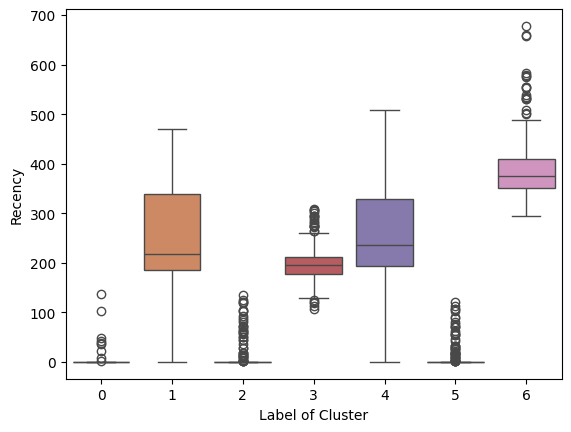

In [36]:
ax = sns.boxplot(data=df_rfm, x='label', y='recency', hue='label', palette='deep', legend=False)

ax.set_xlabel('Label of Cluster')
ax.set_ylabel('Recency')

Text(0, 0.5, 'Frequency')

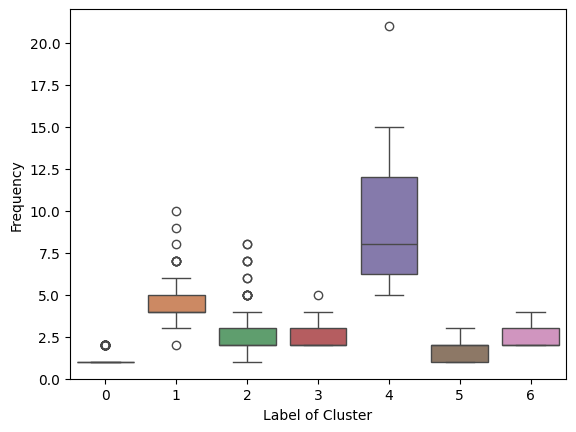

In [37]:
ax = sns.boxplot(data=df_rfm, x='label', y='frequency', hue='label', palette='deep', legend=False)

ax.set_xlabel('Label of Cluster')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Monetary')

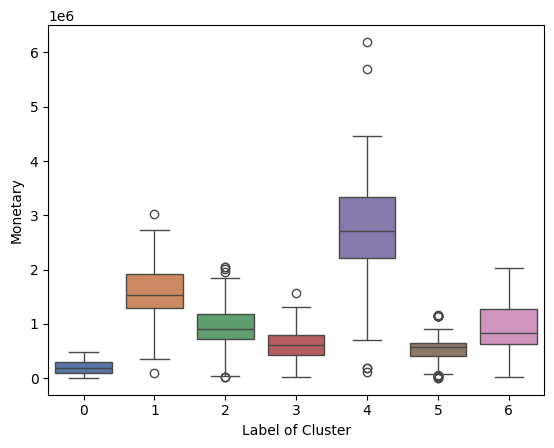

In [38]:
ax = sns.boxplot(data=df_rfm, x='label', y='monetary', hue='label', palette='deep', legend=False)

ax.set_xlabel('Label of Cluster')
ax.set_ylabel('Monetary')

In [39]:
df_rfm.head()

,user_id,monetary,frequency,recency,label
0,001b5eddf7,591500,2,0,5
1,0023cedbf9,7000,1,0,0
2,0024ae4898,436800,2,0,5
3,002d8b5849,204750,1,0,0
4,003e99a26e,145600,1,0,0


In [40]:
df_rfm['label'].value_counts()

label
0    2427
5     720
3     278
2     198
6     165
1      86
4      26
Name: count, dtype: int64

In [41]:
df_rfm[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg(["mean"]).reset_index()

,label,monetary,recency,frequency
,,mean,mean,mean
0,0,1.986093e+05,0.181294,1.012361
1,1,1.578348e+06,237.930233,4.779070
2,2,9.151688e+05,11.505051,2.732323
3,3,6.299279e+05,197.791367,2.453237
4,4,2.746550e+06,235.846154,9.346154
5,5,5.312164e+05,2.640278,1.556944
6,6,9.131408e+05,394.890909,2.375758


In [42]:
df_rfm = df_rfm.merge(df_scaled[['user_id', 'label']], on='user_id')

df_rfm.head()

,user_id,monetary,frequency,recency,label_x,label_y
0,001b5eddf7,591500,2,0,5,5
1,0023cedbf9,7000,1,0,0,0
2,0024ae4898,436800,2,0,5,5
3,002d8b5849,204750,1,0,0,0
4,003e99a26e,145600,1,0,0,0


In [43]:
df_rfm = df_rfm.rename(columns={'label_x': 'label'})

df_rfm.head()

,user_id,monetary,frequency,recency,label,label_y
0,001b5eddf7,591500,2,0,5,5
1,0023cedbf9,7000,1,0,0,0
2,0024ae4898,436800,2,0,5,5
3,002d8b5849,204750,1,0,0,0
4,003e99a26e,145600,1,0,0,0


In [44]:
df_rfm = df_rfm.drop(columns=['label_y'])

df_rfm.head()

,user_id,monetary,frequency,recency,label
0,001b5eddf7,591500,2,0,5
1,0023cedbf9,7000,1,0,0
2,0024ae4898,436800,2,0,5
3,002d8b5849,204750,1,0,0
4,003e99a26e,145600,1,0,0


In [45]:
pd.set_option('float_format', '{:f}'.format)

In [46]:
df_rfm[df_rfm['label'] == 0].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,2427.000000,2427.000000,2427.000000
mean,198609.313968,1.012361,0.181294
std,123165.399154,0.110513,3.912703
min,2400.000000,1.000000,0.000000
25%,91000.000000,1.000000,0.000000
50%,184275.000000,1.000000,0.000000
75%,300000.000000,1.000000,0.000000
max,480000.000000,2.000000,138.000000


In [47]:
df_rfm[df_rfm['label'] == 1].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,86.000000,86.000000,86.000000
mean,1578348.023256,4.779070,237.930233
std,521073.315258,1.331970,109.702248
min,93260.000000,2.000000,0.000000
25%,1283730.000000,4.000000,185.250000
50%,1536600.000000,4.000000,218.500000
75%,1909450.000000,5.000000,338.500000
max,3027200.000000,10.000000,471.000000


In [48]:
df_rfm[df_rfm['label'] == 2].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,198.000000,198.000000,198.000000
mean,915168.787879,2.732323,11.505051
std,411148.539853,1.247969,28.916254
min,13440.000000,1.000000,0.000000
25%,712162.500000,2.000000,0.000000
50%,907000.000000,2.000000,0.000000
75%,1172450.000000,3.000000,0.000000
max,2040000.000000,8.000000,135.000000


In [49]:
df_rfm[df_rfm['label'] == 3].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,278.000000,278.000000,278.000000
mean,629927.859712,2.453237,197.791367
std,284763.504162,0.626987,36.045494
min,20000.000000,2.000000,106.000000
25%,422256.250000,2.000000,177.250000
50%,600600.000000,2.000000,195.000000
75%,788600.000000,3.000000,211.000000
max,1560000.000000,5.000000,308.000000


In [50]:
df_rfm[df_rfm['label'] == 4].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,26.000000,26.000000,26.000000
mean,2746550.384615,9.346154,235.846154
std,1527222.415956,3.825622,128.078005
min,104920.000000,5.000000,0.000000
25%,2203450.000000,6.250000,194.250000
50%,2716650.000000,8.000000,235.500000
75%,3338330.000000,12.000000,329.000000
max,6194800.000000,21.000000,509.000000


In [51]:
df_rfm[df_rfm['label'] == 5].describe()[['monetary', 'frequency', 'recency']]

,monetary,frequency,recency
count,720.000000,720.000000,720.000000
mean,531216.444444,1.556944,2.640278
std,183309.861718,0.537425,13.385055
min,10080.000000,1.000000,0.000000
25%,409500.000000,1.000000,0.000000
50%,576000.000000,2.000000,0.000000
75%,648000.000000,2.000000,0.000000
max,1166400.000000,3.000000,121.000000


<Axes: xlabel='variable', ylabel='value'>

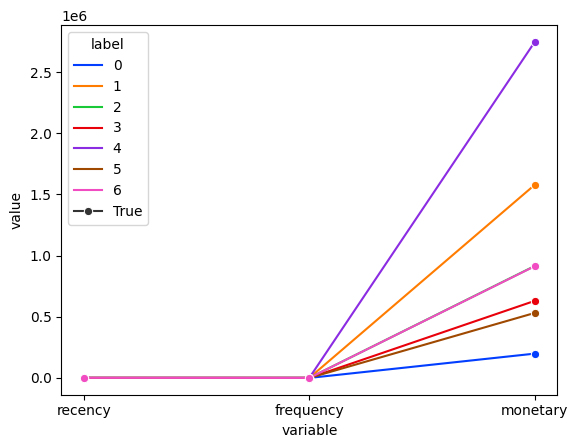

In [52]:
df_melt_new = df_rfm[['monetary', 'recency', 'frequency', 'label']].groupby(by='label').agg("mean").reset_index()

df_melt_new = df_melt_new.melt(id_vars=['label'], value_vars=['recency', 'frequency', 'monetary', 'label'])

sns.lineplot(df_melt_new, x='variable', y='value', hue='label', palette='bright', markers='o', style=True)